# 03 - Pandas

*KI-basierte Datenanalyse*, HFT Stuttgart, 2024 Summer Term, Michael Mommert (michael.mommert@hft-stuttgart.de)

This Notebook provides an introduction into Pandas. This Notebook is based on material published in the book ["Python for Scientists", 3rd edition, James M. Stewart & Michael Mommert, Cambridge University Press](https://www.cambridge.org/us/universitypress/subjects/mathematics/computational-science/python-scientists-3rd-edition).


In Binder, we first have to install the required packages:

In [ ]:
!pip install -r requirements.txt

We import the Pandas, NumPy and Matplotlib packages:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Pandas is a Python package for data analysis and manipulation. Some functionality, and the concept of DataFrames, follows the R programming language.

## Series

A Series is a one-dimensional sequence in Pandas. We can create a Series from scratch:

In [2]:
s = pd.Series([-0.3, 0.4, 3.9, 7.4, 12.0, 15.0, 17.2, 16.8, 13.1, 9.1, 3.7, 0.8], name='temp_C')
s

0     -0.3
1      0.4
2      3.9
3      7.4
4     12.0
5     15.0
6     17.2
7     16.8
8     13.1
9      9.1
10     3.7
11     0.8
Name: temp_C, dtype: float64

Indexing and slicing works the exact same way as in Numpy. For instance, we can access the fourth element from `s`:

In [3]:
s[3]

7.4

The Series class has a number of useful methods. For a list, see [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html). We showcase some methods from the Series class:

In [4]:
print('mean:', s.mean())
print('min:', s.min())
print('standard deviation:', s.std())
print('index of max element:', s.argmax())
print('values as list:', s.values)
print('indices of sorted Series:', s.argsort().values)
print('cumulative sum:', s.cumsum().values)

mean: 8.258333333333333
min: -0.3
standard deviation: 6.520242373260415
index of max element: 6
values as list: [-0.3  0.4  3.9  7.4 12.  15.  17.2 16.8 13.1  9.1  3.7  0.8]
indices of sorted Series: [ 0  1 11 10  2  3  9  4  8  5  7  6]
cumulative sum: [-0.3  0.1  4.  11.4 23.4 38.4 55.6 72.4 85.5 94.6 98.3 99.1]


A Series instance has an index. In this case, it's just numbers. We change the row index labels in our Series object to something more meaningful:

In [5]:
s2 = s.set_axis(['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
                 'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
s2

jan    -0.3
feb     0.4
mar     3.9
apr     7.4
may    12.0
jun    15.0
jul    17.2
aug    16.8
sep    13.1
oct     9.1
nov     3.7
dec     0.8
Name: temp_C, dtype: float64

Now we can retrieve elements in a more intuitive way:

In [6]:
s2['oct']

9.1

## DataFrames

A DataFrame is a two-dimensional data container. It can hold as many columns and rows as you wish. We create a DataFrame object from a dictionary:

In [7]:
df = pd.DataFrame({
    'mon': ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
            'jul', 'aug', 'sep', 'oct', 'nov', 'dec'],
    'temp_C': [-0.3, 0.4, 3.9, 7.4, 12.0, 15.0, 17.2, 16.8, 13.1, 9.1, 3.7, 0.8],
    'rain_mm': [59, 57, 84, 100, 143, 153, 172, 164, 135, 89, 88, 80]})
df

,mon,temp_C,rain_mm
0,jan,-0.3,59
1,feb,0.4,57
2,mar,3.9,84
3,apr,7.4,100
4,may,12.0,143
5,jun,15.0,153
6,jul,17.2,172
7,aug,16.8,164
8,sep,13.1,135
9,oct,9.1,89


We can create the same DataFrame from a list of lists:

In [8]:
df2 = pd.DataFrame(
     [['jan', -0.3, 59], ['feb', 0.4, 57], ['mar', 3.9, 84], ['apr', 7.4, 100], 
      ['may', 12.0, 143], ['jun', 15.0, 153], ['jul', 17.2, 172], ['aug', 16.8, 164], 
      ['sep', 13.1, 135], ['oct', 9.1, 89], ['nov', 3.7, 88], ['dec', 0.8, 80]],
     columns=['mon', 'temp_C', 'rain_mm'])    

### Axis labels and indexes

A DataFrame has two axis (mind the nomenclature here): one referring to columns and one referring to rows. We can retrieve a list of column names:

In [9]:
df.columns

Index(['mon', 'temp_C', 'rain_mm'], dtype='object')

... and can we retrieve the row index of the DataFrame object:

In [10]:
df.index

RangeIndex(start=0, stop=12, step=1)

we can turn this `RangeIndex` into a list:

In [11]:
list(df.index)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]

Instead of using this `RangeIndex`, we change the index of our DataFrame to an already existing column (we use the `mon` column here):

In [12]:
df = df.set_index('mon')
df

,temp_C,rain_mm
mon,,
jan,-0.3,59
feb,0.4,57
mar,3.9,84
apr,7.4,100
may,12.0,143
jun,15.0,153
jul,17.2,172
aug,16.8,164
sep,13.1,135


This looks more intuitive. We can also define the index column when generating a new DataFrame object:

In [13]:
df = pd.DataFrame({
    'temp_C': [-0.3, 0.4, 3.9, 7.4, 12.0, 15.0, 17.2, 16.8, 13.1, 9.1, 3.7, 0.8],
    'rain_mm': [59, 57, 84, 100, 143, 153, 172, 164, 135, 89, 88, 80]},
    index=['jan', 'feb', 'mar', 'apr', 'may', 'jun', 
           'jul', 'aug', 'sep', 'oct', 'nov', 'dec'])
df

,temp_C,rain_mm
jan,-0.3,59
feb,0.4,57
mar,3.9,84
apr,7.4,100
may,12.0,143
jun,15.0,153
jul,17.2,172
aug,16.8,164
sep,13.1,135
oct,9.1,89


We complete our introduction of the DataFrame class with a number of useful methods. Please note that DataFrames share most of the methods that we already saw in the Series class. For a full list, please refer to the [DataFrame documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

The `head()` method return the first `n` rows of the DataFrame:

In [14]:
df.head(3)

,temp_C,rain_mm
jan,-0.3,59
feb,0.4,57
mar,3.9,84


`tail()` returns the last `n` rows:

In [15]:
df.tail(2)

,temp_C,rain_mm
nov,3.7,88
dec,0.8,80


The `describe()` method provides a quick statistical overview of the data in our DataFrame:

In [16]:
df.describe()

,temp_C,rain_mm
count,12.000000,12.000000
mean,8.258333,110.333333
std,6.520242,40.824087
min,-0.300000,57.000000
25%,2.975000,83.000000
50%,8.250000,94.500000
75%,13.575000,145.500000
max,17.200000,172.000000


### Accessing Data

The `iloc[]` methods allows you to access data in your DataFrame based on row index:

In [17]:
df.iloc[0]

temp_C     -0.3
rain_mm    59.0
Name: jan, dtype: float64

`iloc[]` works for a list of indices:

In [18]:
df.iloc[[2,3,5]]

,temp_C,rain_mm
mar,3.9,84
apr,7.4,100
jun,15.0,153


... as well as for a slice of indices:

In [19]:
df.iloc[2:5]

,temp_C,rain_mm
mar,3.9,84
apr,7.4,100
may,12.0,143


we can retrieve entire columns as Series objects:

In [20]:
df.rain_mm

jan     59
feb     57
mar     84
apr    100
may    143
jun    153
jul    172
aug    164
sep    135
oct     89
nov     88
dec     80
Name: rain_mm, dtype: int64

If you don't want to use row numbers, you can use whatever index you defined in your DataFrame. In this case, we have to use the `loc[]` method:

In [21]:
df.loc['jan']

temp_C     -0.3
rain_mm    59.0
Name: jan, dtype: float64

`loc[]` also supports lists of indices:

In [22]:
df.loc[['mar', 'apr', 'jun']]

,temp_C,rain_mm
mar,3.9,84
apr,7.4,100
jun,15.0,153


... and slices:

In [23]:
df.loc['mar':'may']

,temp_C,rain_mm
mar,3.9,84
apr,7.4,100
may,12.0,143


Note how the slice includes the month of April, which, of course, lies between March and May.

We can also use `loc[]` to retrieve columns, but have to specify rows explicitly:

In [24]:
df.loc[:, 'rain_mm']

jan     59
feb     57
mar     84
apr    100
may    143
jun    153
jul    172
aug    164
sep    135
oct     89
nov     88
dec     80
Name: rain_mm, dtype: int64

we can combine queries over columns and rows:

In [25]:
df.loc['may':'sep', 'rain_mm']

may    143
jun    153
jul    172
aug    164
sep    135
Name: rain_mm, dtype: int64

we can apply methods over our selection:

In [26]:
df.loc['may':'sep', 'rain_mm'].sum()

767

and we can use comparison mechanisms to make selections:

In [27]:
df.loc[df.rain_mm < 100, 'temp_C']

jan   -0.3
feb    0.4
mar    3.9
oct    9.1
nov    3.7
dec    0.8
Name: temp_C, dtype: float64

### Modifying data

we can use the same mechanisms to modify DataFrames and Series objects:

In [28]:
df2 = df.copy()
df2.loc[df2.rain_mm < 100, 'temp_C'] = 0
df2

,temp_C,rain_mm
jan,0.0,59
feb,0.0,57
mar,0.0,84
apr,7.4,100
may,12.0,143
jun,15.0,153
jul,17.2,172
aug,16.8,164
sep,13.1,135
oct,0.0,89


we can also use `loc[]` to create a new column:

In [29]:
df3 = df.copy()
df3.loc[:, 'snowfall'] = [True, True, False, False, False, False, 
                          False, False, False, False, True, True]
df3

,temp_C,rain_mm,snowfall
jan,-0.3,59,True
feb,0.4,57,True
mar,3.9,84,False
apr,7.4,100,False
may,12.0,143,False
jun,15.0,153,False
jul,17.2,172,False
aug,16.8,164,False
sep,13.1,135,False
oct,9.1,89,False


we can also add new rows to a DataFrame:

In [30]:
df3.loc['avg'] = [8.3, 110.3, False]
df3

,temp_C,rain_mm,snowfall
jan,-0.3,59.0,True
feb,0.4,57.0,True
mar,3.9,84.0,False
apr,7.4,100.0,False
may,12.0,143.0,False
jun,15.0,153.0,False
jul,17.2,172.0,False
aug,16.8,164.0,False
sep,13.1,135.0,False
oct,9.1,89.0,False


to add multiple rows, we first have to create a separate DataFrame and then append it to the original DataFrame:

In [31]:
df2 = pd.DataFrame({'temp_C': [9.7, 9.5, 9.9],
                    'rain_mm': [165.8, 146.1, 139.2]},
                   index=['2020', '2019', '2018'])
pd.concat([df, df2])

,temp_C,rain_mm
jan,-0.3,59.0
feb,0.4,57.0
mar,3.9,84.0
apr,7.4,100.0
may,12.0,143.0
jun,15.0,153.0
jul,17.2,172.0
aug,16.8,164.0
sep,13.1,135.0
oct,9.1,89.0


we can use `concat()` to append columns, too:

In [32]:
df2 = pd.DataFrame({'temp_min_C': [-1.9, 1.0, 6.2, 9.7, 13.0, 13.1, 
                                   11.0, 7.8, 3.5, 0.6, -2.5, -3.0],
                    'temp_max_C': [3.5, 6.5, 12.3, 16.8, 20.9, 21.6,
                                  19.2, 16.3, 11.5, 7.3, 3.3, 2.5]},
                   index=['dec', 'nov', 'oct', 'sep', 'aug', 'jul' ,
                          'jun', 'may', 'apr', 'mar', 'feb', 'jan'])
pd.concat([df, df2], axis=1)

,temp_C,rain_mm,temp_min_C,temp_max_C
jan,-0.3,59,-3.0,2.5
feb,0.4,57,-2.5,3.3
mar,3.9,84,0.6,7.3
apr,7.4,100,3.5,11.5
may,12.0,143,7.8,16.3
jun,15.0,153,11.0,19.2
jul,17.2,172,13.1,21.6
aug,16.8,164,13.0,20.9
sep,13.1,135,9.7,16.8
oct,9.1,89,6.2,12.3


we can concatenate DataFrames with different numbers of columns:

In [33]:
df2 = pd.DataFrame({'temp_C': [9.7, 9.5, 9.9],
                    'rain_mm': [165.8, 146.1, 139.2],
                    'snowfall': [True, True, True]},
                   index=['2020', '2019', '2018'])
pd.concat([df, df2])

,temp_C,rain_mm,snowfall
jan,-0.3,59.0,NaN
feb,0.4,57.0,NaN
mar,3.9,84.0,NaN
apr,7.4,100.0,NaN
may,12.0,143.0,NaN
jun,15.0,153.0,NaN
jul,17.2,172.0,NaN
aug,16.8,164.0,NaN
sep,13.1,135.0,NaN
oct,9.1,89.0,NaN


Of course, this results in a bunch of NaNs, since the data is missing.

We repeat this exercise with an *inner join*:

In [34]:
df2 = pd.DataFrame({
    'temp_C': [9.7, 9.5, 9.9],
    'rain_mm': [165.8, 146.1, 139.2],
    'snowfall': [True, True, True]},
    index=['2020', '2019', '2018'])
pd.concat([df, df2], join='inner')

,temp_C,rain_mm
jan,-0.3,59.0
feb,0.4,57.0
mar,3.9,84.0
apr,7.4,100.0
may,12.0,143.0
jun,15.0,153.0
jul,17.2,172.0
aug,16.8,164.0
sep,13.1,135.0
oct,9.1,89.0


The *inner join* will only merge those parts of the DataFrame for which complete columns are available.

To merge two DataFrames on a common (shared) index, we can use the `merge()` function:

In [35]:
pd.merge(df, df3, left_index=True, right_index=True)

,temp_C_x,rain_mm_x,temp_C_y,rain_mm_y,snowfall
jan,-0.3,59,-0.3,59.0,True
feb,0.4,57,0.4,57.0,True
mar,3.9,84,3.9,84.0,False
apr,7.4,100,7.4,100.0,False
may,12.0,143,12.0,143.0,False
jun,15.0,153,15.0,153.0,False
jul,17.2,172,17.2,172.0,False
aug,16.8,164,16.8,164.0,False
sep,13.1,135,13.1,135.0,False
oct,9.1,89,9.1,89.0,False


### Dealing with missing data

we create a DataFrame with some missing data:

In [36]:
df2 = df.copy()
df2.loc[['may', 'sep'], 'rain_mm'] = np.nan
df2.loc['feb', 'temp_C'] = np.nan
df2

,temp_C,rain_mm
jan,-0.3,59.0
feb,NaN,57.0
mar,3.9,84.0
apr,7.4,100.0
may,12.0,NaN
jun,15.0,153.0
jul,17.2,172.0
aug,16.8,164.0
sep,13.1,NaN
oct,9.1,89.0


we check for missing data:

In [37]:
df2.isna()

,temp_C,rain_mm
jan,False,False
feb,True,False
mar,False,False
apr,False,False
may,False,True
jun,False,False
jul,False,False
aug,False,False
sep,False,True
oct,False,False


Of course, the easiest solution to get rid of missing data is to drop all rows with missing data:

In [38]:
df2.dropna()

,temp_C,rain_mm
jan,-0.3,59.0
mar,3.9,84.0
apr,7.4,100.0
jun,15.0,153.0
jul,17.2,172.0
aug,16.8,164.0
oct,9.1,89.0
nov,3.7,88.0
dec,0.8,80.0


But this is not always an option. We can fill all missing data with the mean value across the corresponding column:

In [39]:
df2.fillna(df2.mean(axis=0))

,temp_C,rain_mm
jan,-0.300000,59.0
feb,8.972727,57.0
mar,3.900000,84.0
apr,7.400000,100.0
may,12.000000,104.6
jun,15.000000,153.0
jul,17.200000,172.0
aug,16.800000,164.0
sep,13.100000,104.6
oct,9.100000,89.0


This is a little bit more useful. But only a little. The average temperature in February is way too high. 

Instead, we can also interpolate missing values based on data:

In [40]:
df2.interpolate()

,temp_C,rain_mm
jan,-0.3,59.0
feb,1.8,57.0
mar,3.9,84.0
apr,7.4,100.0
may,12.0,126.5
jun,15.0,153.0
jul,17.2,172.0
aug,16.8,164.0
sep,13.1,126.5
oct,9.1,89.0


## Specific types of data

### Categorical data

we create a DataFrame with categorical data:

In [41]:
df2 = pd.DataFrame({'clouds': ['cloudy', 'cloudy', 'partly cloudy', 'mostly clear', 
                               'clear', 'clear', 'partly cloudy'],
                    'uv': [0, 0, 1, 3, 5, 5, 1]},
                    index=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
df2

,clouds,uv
mon,cloudy,0
tue,cloudy,0
wed,partly cloudy,1
thu,mostly clear,3
fri,clear,5
sat,clear,5
sun,partly cloudy,1


we extract the unique elements from column *clouds*:

In [42]:
df2.clouds.unique()

array(['cloudy', 'partly cloudy', 'mostly clear', 'clear'], dtype=object)

we count how often those unique elements appear:

In [43]:
df2.clouds.value_counts()

clouds
cloudy           2
partly cloudy    2
clear            2
mostly clear     1
Name: count, dtype: int64

we can derive the mean uv index for those days with *partly cloudy* conditions:

In [44]:
df2.loc[df2.clouds == 'partly cloudy', 'uv'].mean()

1.0

### Textual data

we identify rows for which the *clouds* column contains the word *cloud*:

In [45]:
df2.clouds.str.contains('cloud', regex=False)

mon     True
tue     True
wed     True
thu    False
fri    False
sat    False
sun     True
Name: clouds, dtype: bool

we can utilize the resulting logical array to extract those rows:

In [46]:
df2.loc[df2.clouds.str.contains('cloud', regex=False)]

,clouds,uv
mon,cloudy,0
tue,cloudy,0
wed,partly cloudy,1
sun,partly cloudy,1


we can replace the appearance of the word *cloud* with *sunny*:

In [47]:
df4 = df2.copy()
df4.loc[:, 'clouds'] = df4.clouds.str.replace('cloudy', 'sunny')
df4

,clouds,uv
mon,sunny,0
tue,sunny,0
wed,partly sunny,1
thu,mostly clear,3
fri,clear,5
sat,clear,5
sun,partly sunny,1


### Dates and times

we create a Series containing dates and times:

In [48]:
dates = pd.Series(['2020-01-01 12:34', '2020-03-01 08:47', 
                   '2020-06-01 14:23', '2020-09-01 22:56', 
                   '2020-12-01 13:45'])
dates

0    2020-01-01 12:34
1    2020-03-01 08:47
2    2020-06-01 14:23
3    2020-09-01 22:56
4    2020-12-01 13:45
dtype: object

we transform those date/time strings to datetime objects:

In [49]:
dates = pd.to_datetime(dates)
dates

0   2020-01-01 12:34:00
1   2020-03-01 08:47:00
2   2020-06-01 14:23:00
3   2020-09-01 22:56:00
4   2020-12-01 13:45:00
dtype: datetime64[ns]

we extract times:

In [50]:
dates.dt.time

0    12:34:00
1    08:47:00
2    14:23:00
3    22:56:00
4    13:45:00
dtype: object

we compute time differences relative to the first row:

In [51]:
datedelta = dates - dates.iloc[0]
datedelta

0     0 days 00:00:00
1    59 days 20:13:00
2   152 days 01:49:00
3   244 days 10:22:00
4   335 days 01:11:00
dtype: timedelta64[ns]

... and we convert these differences to seconds:

In [52]:
datedelta.astype('timedelta64[s]')

0     0 days 00:00:00
1    59 days 20:13:00
2   152 days 01:49:00
3   244 days 10:22:00
4   335 days 01:11:00
dtype: timedelta64[s]

## Functions

we create a new DataFrame and compute the mean over each column:

In [53]:
df = pd.DataFrame({
    'temp_C': [12.3, 13.5, 9.2, 8.2, 10.2, 11.3, 13.5]},
    index=['mon', 'tue', 'wed', 'thu', 'fri', 'sat', 'sun'])
df = pd.concat([df, df2], axis=1)

df.loc[:, ['temp_C', 'uv']].mean()

temp_C    11.171429
uv         2.142857
dtype: float64

we use the aggregate method:

In [54]:
df.loc[:, ['temp_C', 'uv']].agg(['min', 'max', 'mean'])

,temp_C,uv
min,8.200000,0.000000
max,13.500000,5.000000
mean,11.171429,2.142857


we aggregate different functions over different columns:

In [55]:
df.loc[:, ['temp_C', 'uv']].agg({'temp_C': ['min', 'max', 'mean'], 'uv': 'median'})

,temp_C,uv
min,8.200000,NaN
max,13.500000,NaN
mean,11.171429,NaN
median,NaN,1.0


we apply our own function to the data:

In [56]:
def func(x):
    """some function"""
    return np.sum(3*x**2+3*x)
    
df.loc[:, ['temp_C', 'uv']].apply(func)

temp_C    2932.8
uv         228.0
dtype: float64

## Data Visualization

we plot the temperature data as bar plot:

<Axes: >

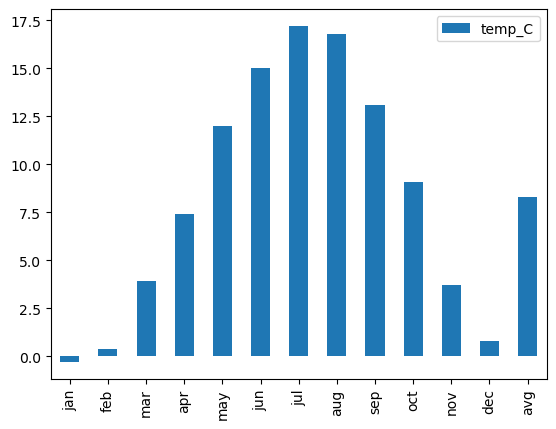

In [57]:
df3.plot(y='temp_C', kind='bar')

we create a histogram for all columns containing numerical data:

array([[<Axes: title={'center': 'temp_C'}>,
        <Axes: title={'center': 'uv'}>]], dtype=object)

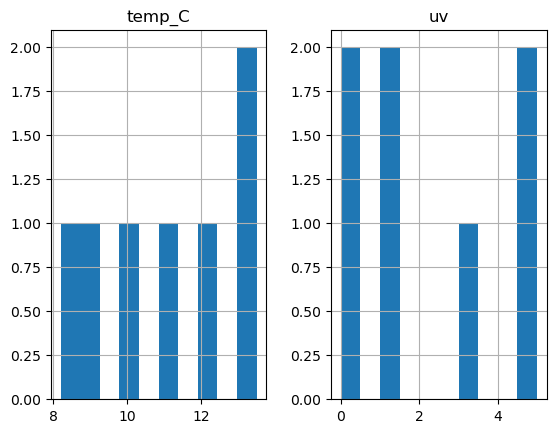

In [58]:
df.hist()

we create a histogram over textual, categorical data:

<Axes: xlabel='clouds'>

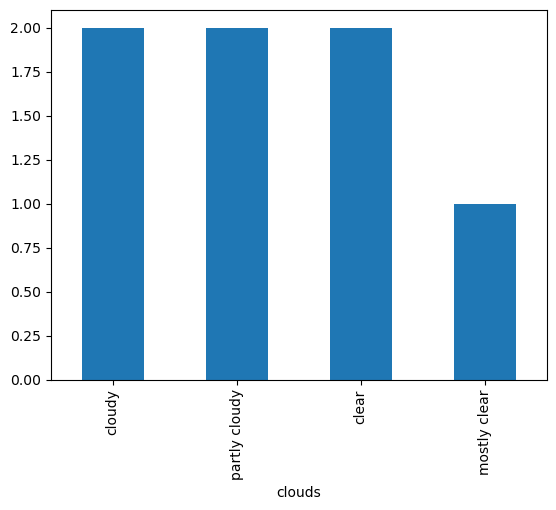

In [59]:
df2.clouds.value_counts().plot(kind='bar')